In [7]:
from google.colab import files
uploaded = files.upload()


Saving SMSSpamCollection to SMSSpamCollection (1)


In [8]:
import pandas as pd

# Load tab-separated file
df = pd.read_csv("SMSSpamCollection", sep='\t', header=None, names=["label", "message"])

# Show first few rows
df.head()


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
# Check shape and types
print("Shape:", df.shape)
df.info()

# Class distribution
print("\nClass distribution:")
print(df['label'].value_counts())


Shape: (5572, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB

Class distribution:
label
ham     4825
spam     747
Name: count, dtype: int64


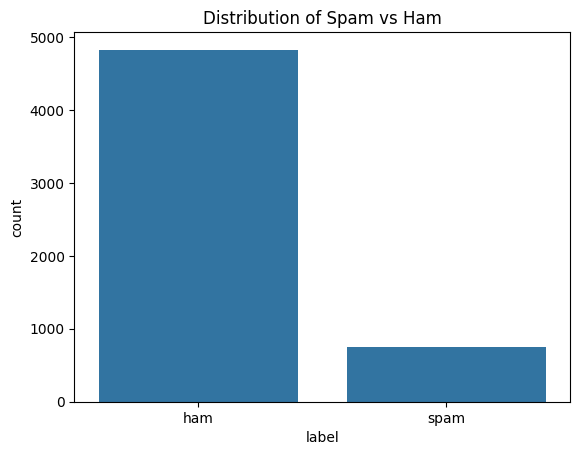

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='label')
plt.title("Distribution of Spam vs Ham")
plt.show()


In [11]:
df['message_length'] = df['message'].apply(len)
df[['label', 'message_length']].groupby('label').mean()


,message_length
label,
ham,71.482487
spam,138.670683


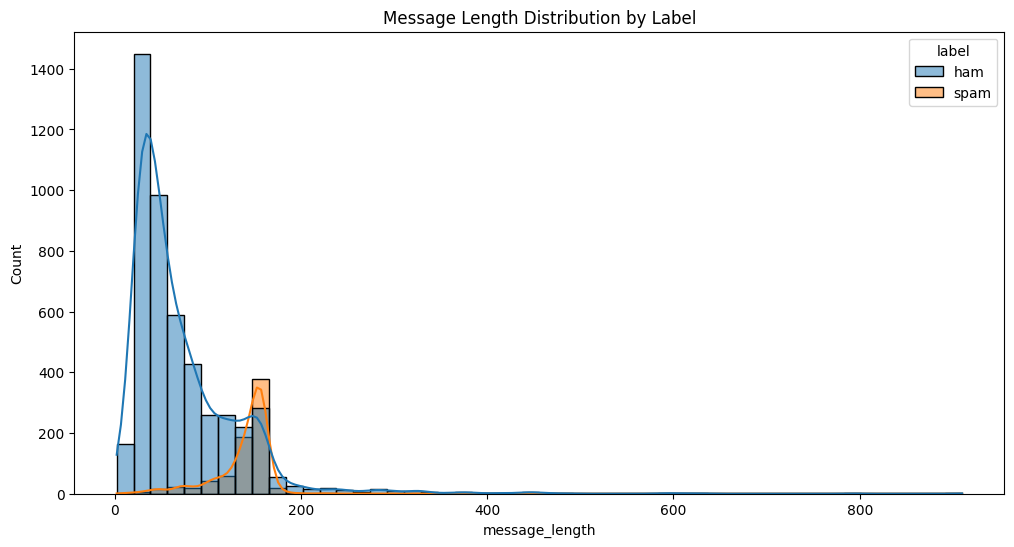

In [12]:
plt.figure(figsize=(12,6))
sns.histplot(data=df, x='message_length', hue='label', bins=50, kde=True)
plt.title("Message Length Distribution by Label")
plt.show()


In [15]:
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import nltk


In [17]:
import shutil
shutil.rmtree('/root/nltk_data', ignore_errors=True)  # Clean slate


In [18]:
import nltk

nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
def clean_and_tokenize(text):
    tokens = text.lower().split()  # Basic tokenization
    return [word for word in tokens if word.isalpha() and word not in stop_words and word not in punct]


In [21]:
spam_words = []
ham_words = []

for i in range(len(df)):
    tokens = clean_and_tokenize(df['message'][i])
    if df['label'][i] == 'spam':
        spam_words.extend(tokens)
    else:
        ham_words.extend(tokens)


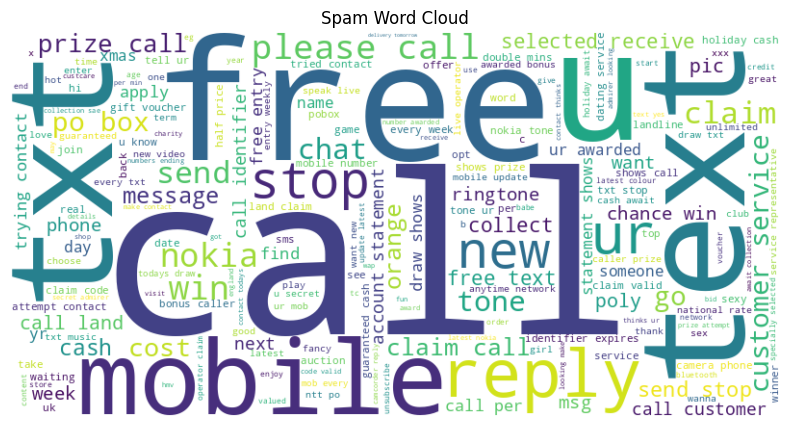

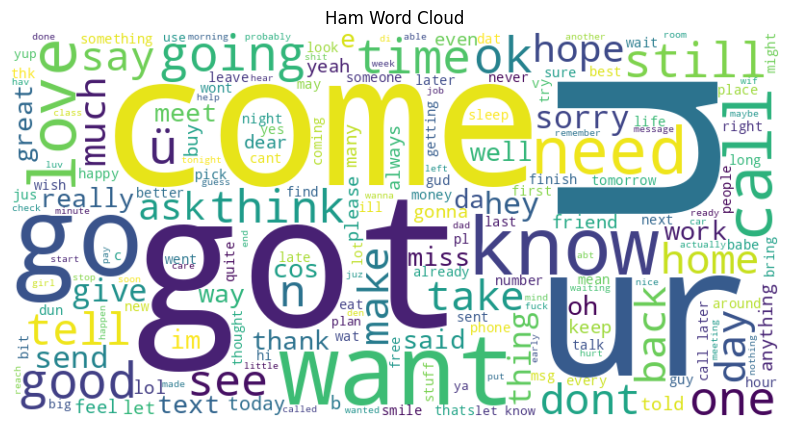

In [22]:
!pip install wordcloud
from wordcloud import WordCloud

# Word cloud for spam
spam_wc = WordCloud(width=800, height=400, background_color='white').generate(" ".join(spam_words))
plt.figure(figsize=(10,5))
plt.imshow(spam_wc, interpolation='bilinear')
plt.axis("off")
plt.title("Spam Word Cloud")
plt.show()

# Word cloud for ham
ham_wc = WordCloud(width=800, height=400, background_color='white').generate(" ".join(ham_words))
plt.figure(figsize=(10,5))
plt.imshow(ham_wc, interpolation='bilinear')
plt.axis("off")
plt.title("Ham Word Cloud")
plt.show()


In [23]:
df.head()

,label,message,message_length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [24]:
df['label_num'] = df['label'].map({'ham': 0, 'spam': 1})


In [25]:
from sklearn.model_selection import train_test_split

X = df['message']         # Feature = the message
y = df['label_num']       # Target = 0 or 1

# Split: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training samples:", len(X_train))
print("Test samples:", len(X_test))


Training samples: 4457
Test samples: 1115


In [26]:
X_train, X_test, y_train, y_test


(1978    Reply to win £100 weekly! Where will the 2006 ...
 3989    Hello. Sort of out in town already. That . So ...
 3935     How come guoyang go n tell her? Then u told her?
 4078    Hey sathya till now we dint meet not even a si...
 4086    Orange brings you ringtones from all time Char...
                               ...                        
 3772    Hi, wlcome back, did wonder if you got eaten b...
 5191                               Sorry, I'll call later
 5226        Prabha..i'm soryda..realy..frm heart i'm sory
 5390                           Nt joking seriously i told
 860               Did he just say somebody is named tampa
 Name: message, Length: 4457, dtype: object,
 3245    Squeeeeeze!! This is christmas hug.. If u lik ...
 944     And also I've sorta blown him off a couple tim...
 1044    Mmm thats better now i got a roast down me! i...
 2484        Mm have some kanji dont eat anything heavy ok
 812     So there's a ring that comes with the guys cos...
           

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the vectorizer
vectorizer = CountVectorizer()


In [28]:
# Fit only on training data to avoid data leakage
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Optional: check feature names (the words)
print("Sample words:", vectorizer.get_feature_names_out()[:10])
print("Train vector shape:", X_train_vec.shape)


Sample words: ['00' '000' '000pes' '008704050406' '0089' '0121' '01223585236'
 '01223585334' '02' '0207']
Train vector shape: (4457, 7702)


In [29]:
from sklearn.linear_model import LogisticRegression

# Initialize and train model
model = LogisticRegression()
model.fit(X_train_vec, y_train)


LogisticRegression()

In [31]:
y_pred = model.predict(X_test_vec)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

Accuracy: 0.9883408071748879

Classification Report:
               precision    recall  f1-score   support

         Ham       0.99      1.00      0.99       966
        Spam       1.00      0.91      0.95       149

    accuracy                           0.99      1115
   macro avg       0.99      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115



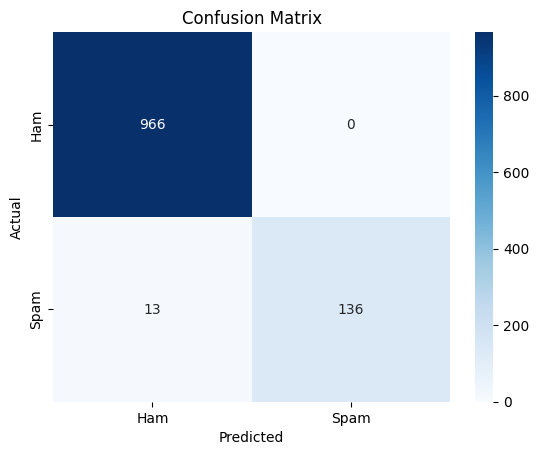

In [32]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=["Ham", "Spam"]))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Ham", "Spam"], yticklabels=["Ham", "Spam"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

model.fit(X_train_tfidf, y_train)
y_pred = model.predict(X_test_tfidf)


In [34]:
sample = ["Congratulations, you've won a free cruise! Call now.", "Can we meet tomorrow?"]
sample_vec = vectorizer.transform(sample)
print(model.predict(sample_vec))  # 1 = spam, 0 = ham


[1 0]


In [36]:
custom_message = ["Hola Dapsin, I am Nancy Wright"]
custom_vec = vectorizer.transform(custom_message)
prediction = model.predict(custom_vec)

print("Prediction:", "Spam" if prediction[0] == 1 else "Ham")
proba = model.predict_proba(custom_vec)
print(f"Probability of Ham: {proba[0][0]:.2f}, Spam: {proba[0][1]:.2f}")


Prediction: Ham
Probability of Ham: 0.98, Spam: 0.02


In [37]:
import pickle

# Save the model
with open("spam_classifier_model.pkl", "wb") as f:
    pickle.dump(model, f)

# Save the vectorizer
with open("spam_vectorizer.pkl", "wb") as f:
    pickle.dump(vectorizer, f)


In [38]:
from google.colab import files

# Download the files
files.download("spam_classifier_model.pkl")
files.download("spam_vectorizer.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>